# Project- Part A: Airbnb Price Prediction and Insights

#### **1. Overview:**

* The project focuses on predicting Airbnb listing prices using machine learning.

* Various features like property type, room type, location, amenities, and host characteristics are used to build the model.


#### **2. Problem Statement:**


* A regression model is developed to predict Airbnb prices based on given features.
* The goal is to help hosts optimize pricing strategies.




**Here is my video link below ⬇:**

https://drive.google.com/file/d/1nGVzZpJ0WXVSJhV-E4AJD8qE76GBaCi2/view?usp=sharing


### **1. Import the required packages**

In [ ]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Pacakages
#For Feature Selection
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#For Validation
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

### **2. Reading and Exploring the data**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Airbnb_data.csv')

df.head()     #show only top rows

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## #  Essential Exploratory Data Analysis (EDA)

1. Analyze the dataset for trends, missing values, and outliers.
2. Perform data cleaning, feature engineering, and transformations.



In [ ]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
# Summary Statistics of the dataset

df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
# # Check for missing values
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [ ]:
#check for the duplicates
df.duplicated().sum()  #show the total number of duplicate rows present in the data

0

In [ ]:
df[df.duplicated()]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds


In [ ]:
# Fill NaN values with 0
df.fillna(0, inplace=True)



### **3. Various plots (histograms, box plots, pair plots) are used to understand the distribution of prices and relationships between features.**

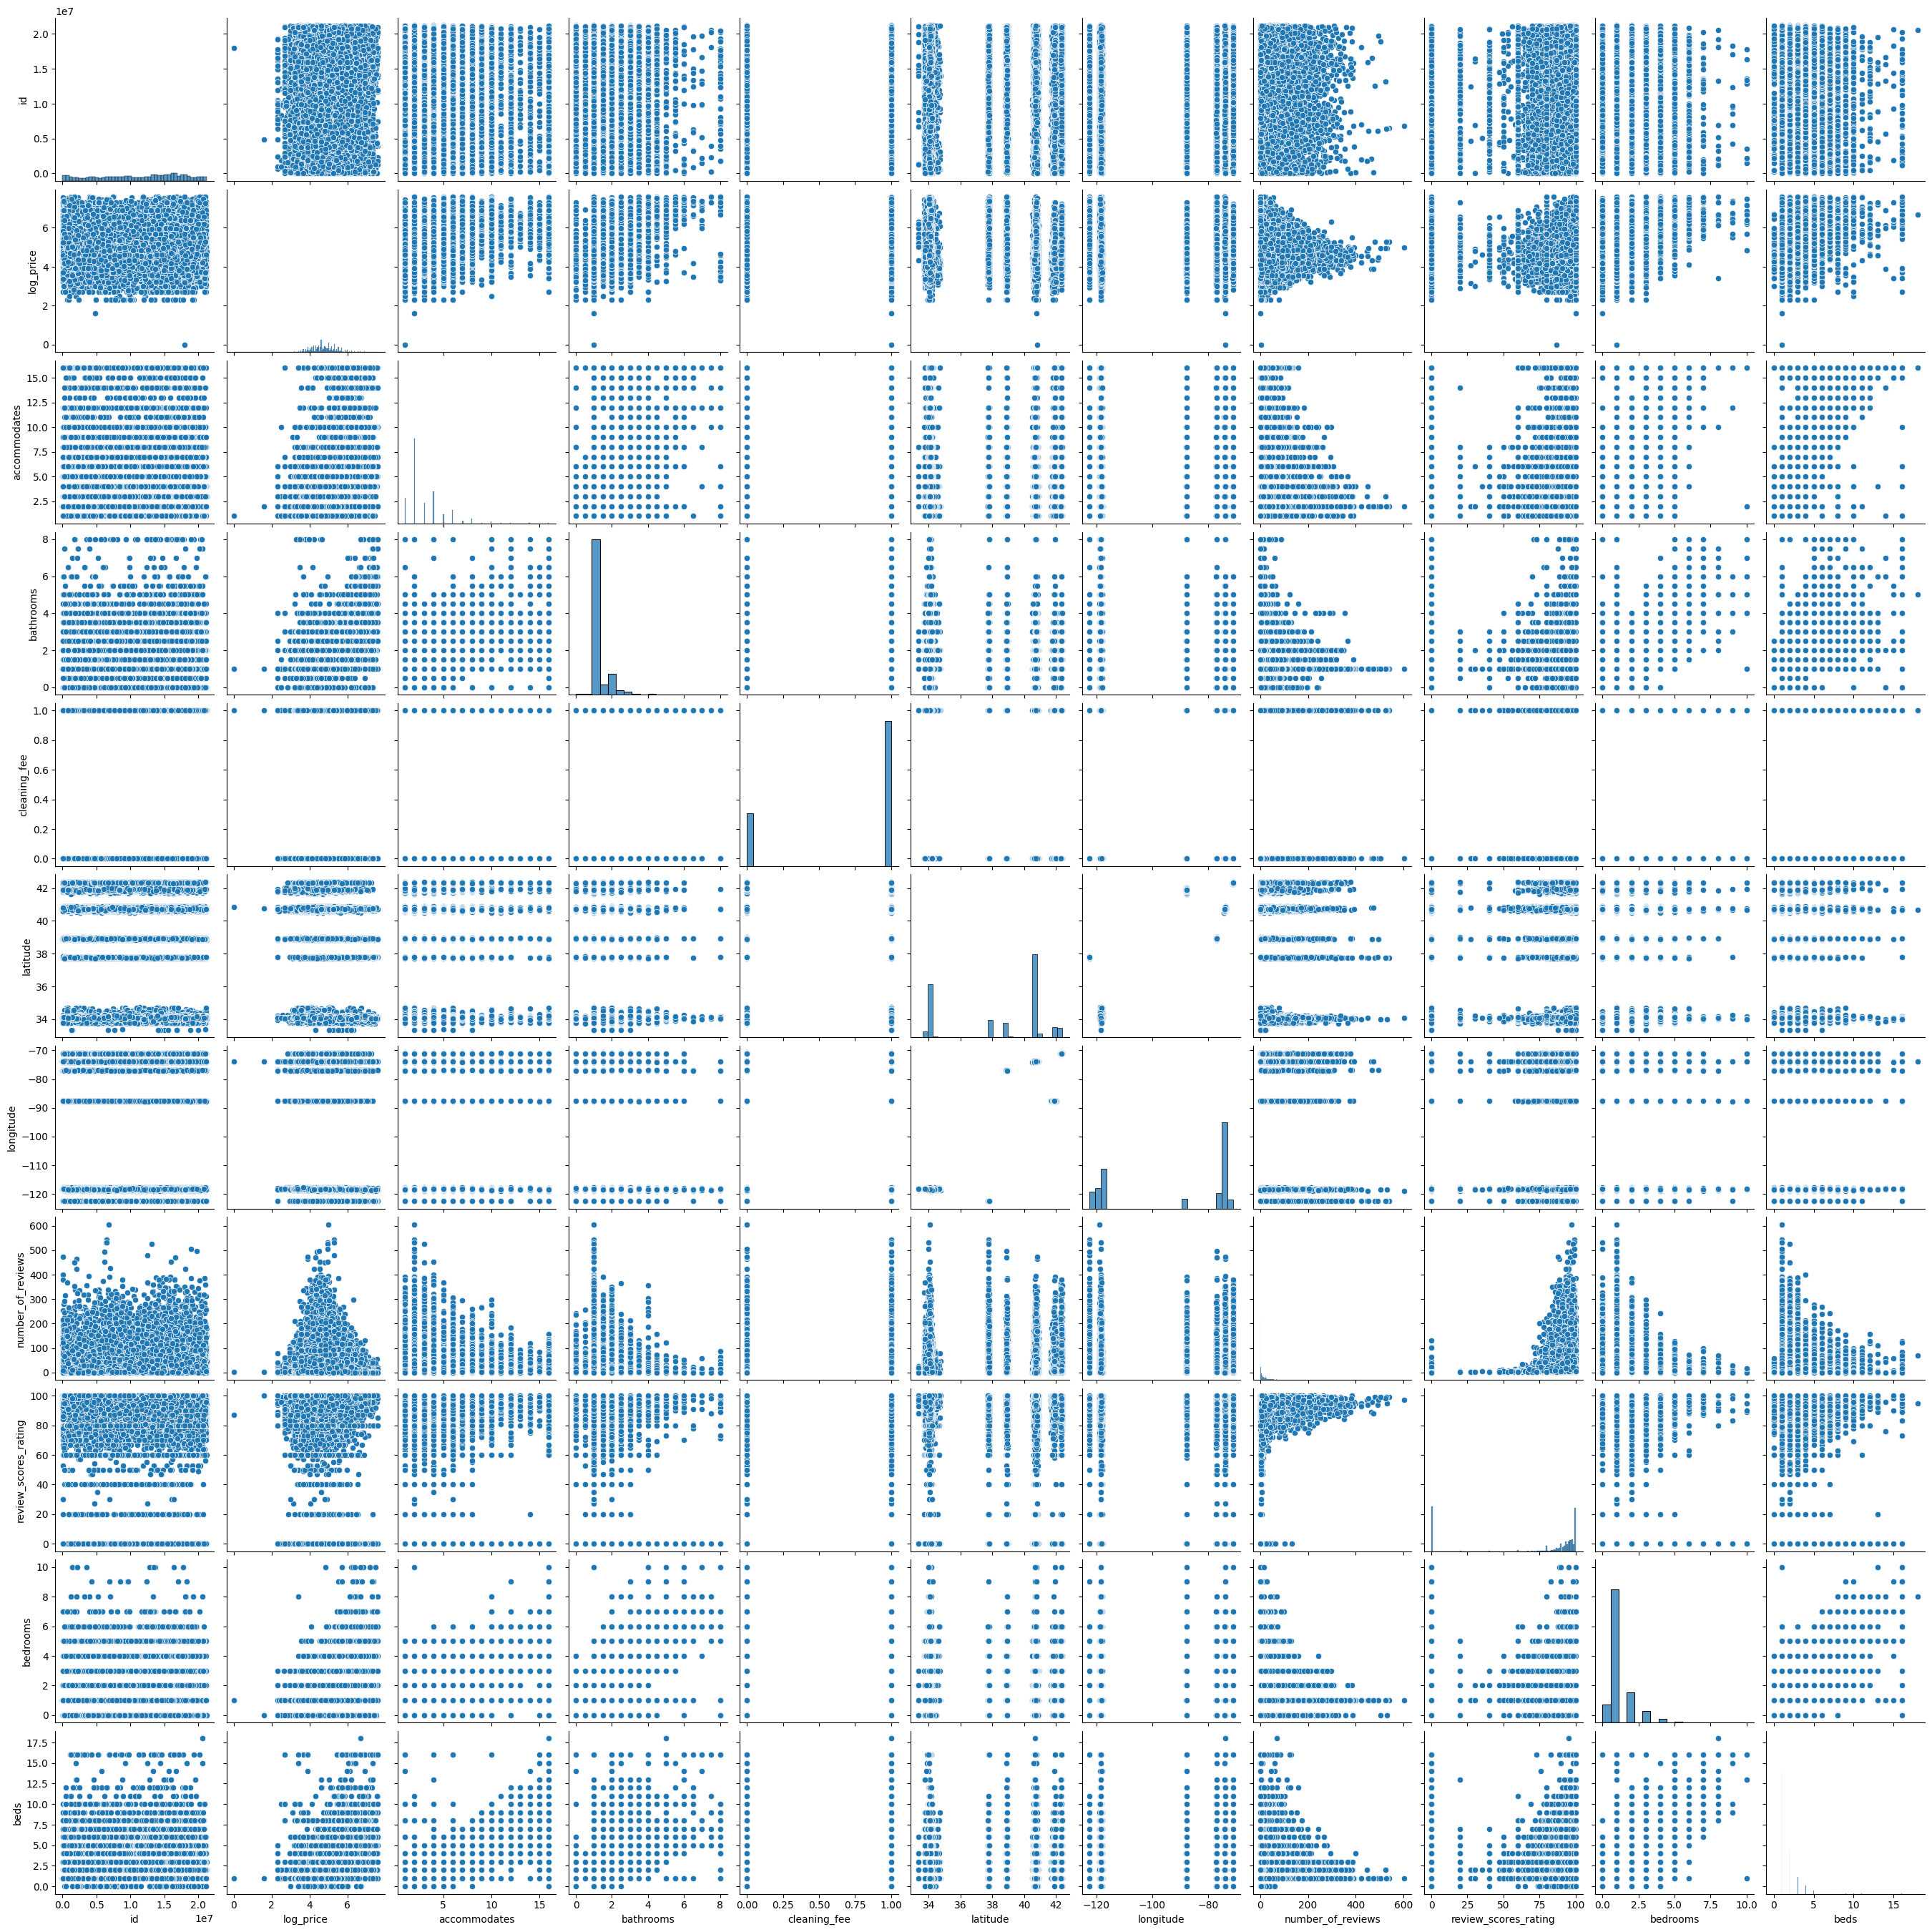

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

## ## summary
pair plot shows relationships between numerical variables in dataset:


*  Some features (e.g., accommodates and log_price) show correlation, while others are more scattered.
* Histograms on the diagonal suggest skewed distributions in certain features.


*  Visible outliers and clustered values may indicate categorical encoding or discrete data points.

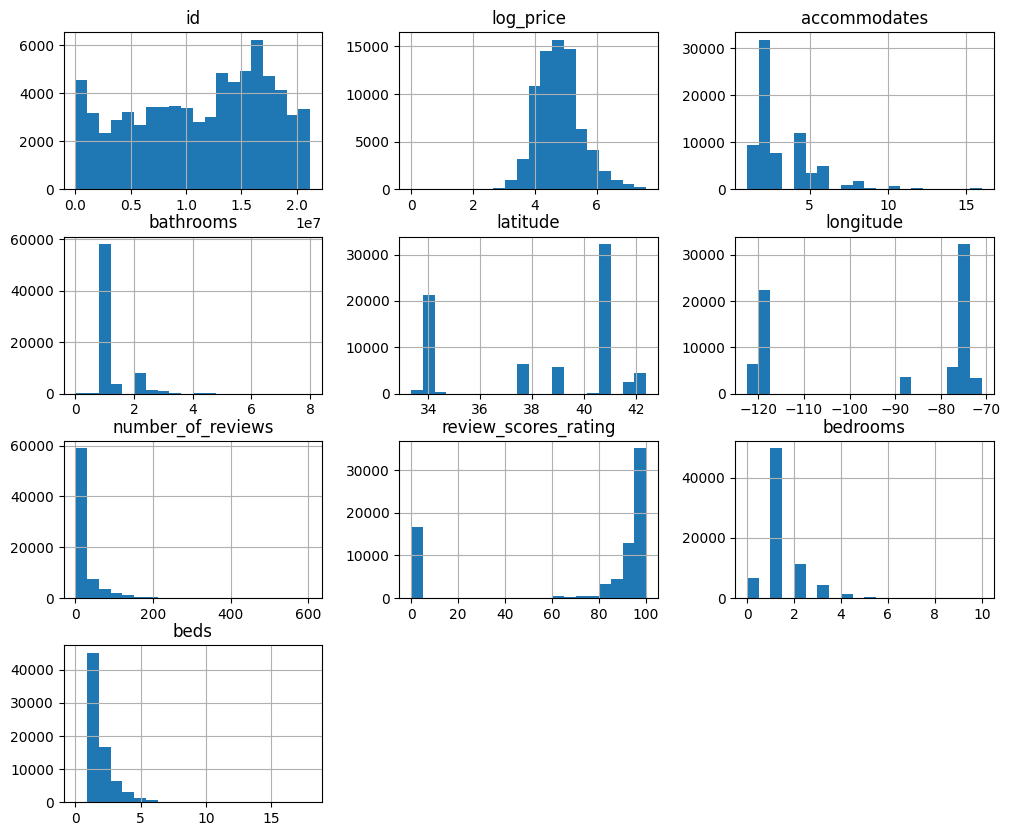

In [ ]:
# Histograms of individual features
df.hist(figsize=(12, 10), bins = 20)
plt.show()


##### Summary of Histogram

The majority of listings fall within a lower price range.

*  Shows the frequency distribution of Airbnb prices.
*  Likely a right-skewed distribution, indicating a small number of high-priced listings.

*  The majority of listings fall within a lower price range.
*   log_price follows a normal-like distribution around 4-5.
*   number_of_reviews is highly skewed, mostly 0-50 reviews.
*   review_scores_rating peaks around 80 and 100.



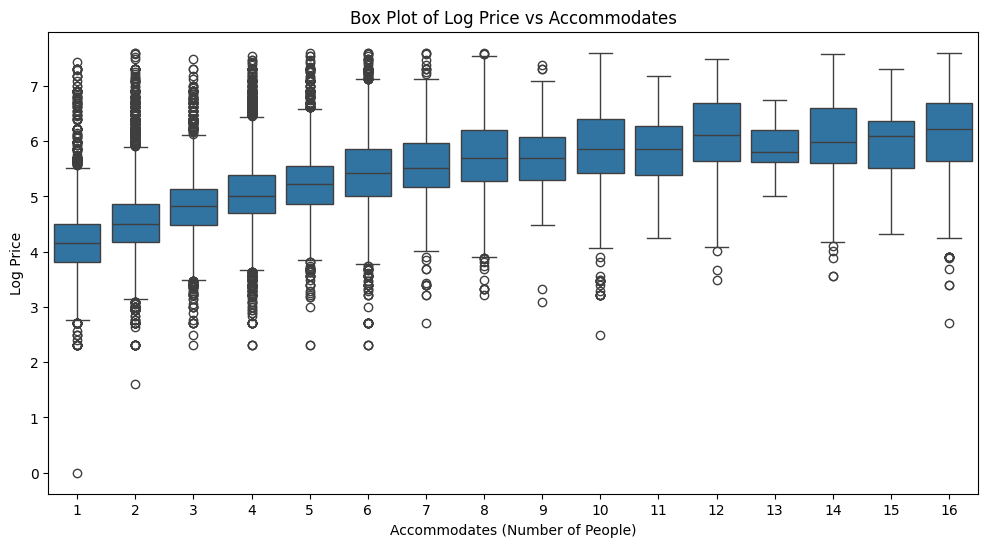

In [ ]:
# Boxplots to check for outliers

# Plotting box plot
plt.figure(figsize=(12,6))
sns.boxplot(x=df["accommodates"], y=df["log_price"])

plt.xlabel("Accommodates (Number of People)")
plt.ylabel("Log Price")
plt.title("Box Plot of Log Price vs Accommodates")
plt.show()

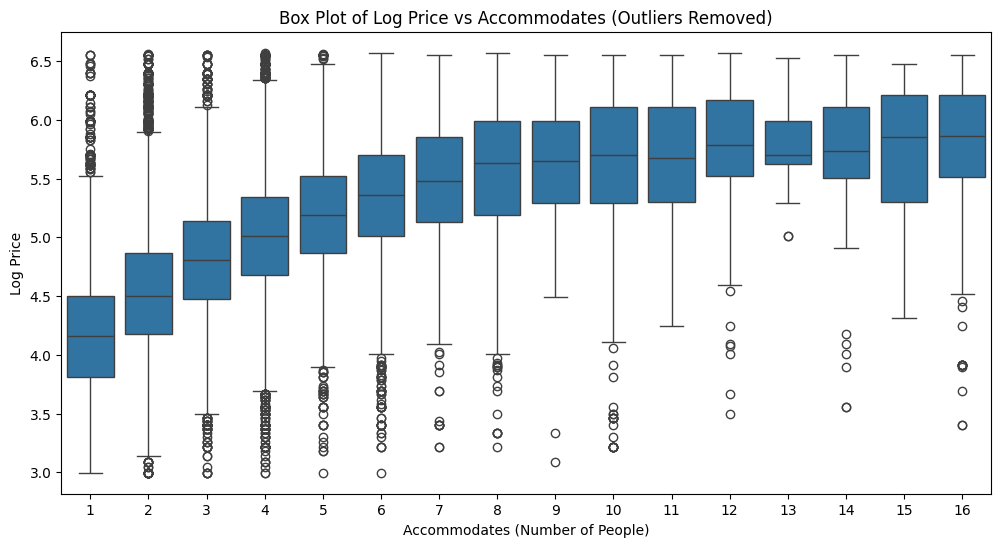

In [ ]:
# To remove the outliers from box plot

Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]


# Plotting box plot of the filtered data
plt.figure(figsize=(12,6))
sns.boxplot(x=df["accommodates"], y=df["log_price"])

plt.xlabel("Accommodates (Number of People)")
plt.ylabel("Log Price")
plt.title("Box Plot of Log Price vs Accommodates (Outliers Removed)")
plt.show()


#### # Summary of Boxplot


*   A box plot is used to visualize the distribution of Airbnb prices.
*   It highlights outliers and the spread of prices.
*   As the number of accommodates increases, the median log price also increases, indicating that larger accommodations tend to be priced higher.
*  Outliers: There are significant outliers in almost all categories, especially for lower accommodates (1-6 people).



### **4. Correlation Matrix**

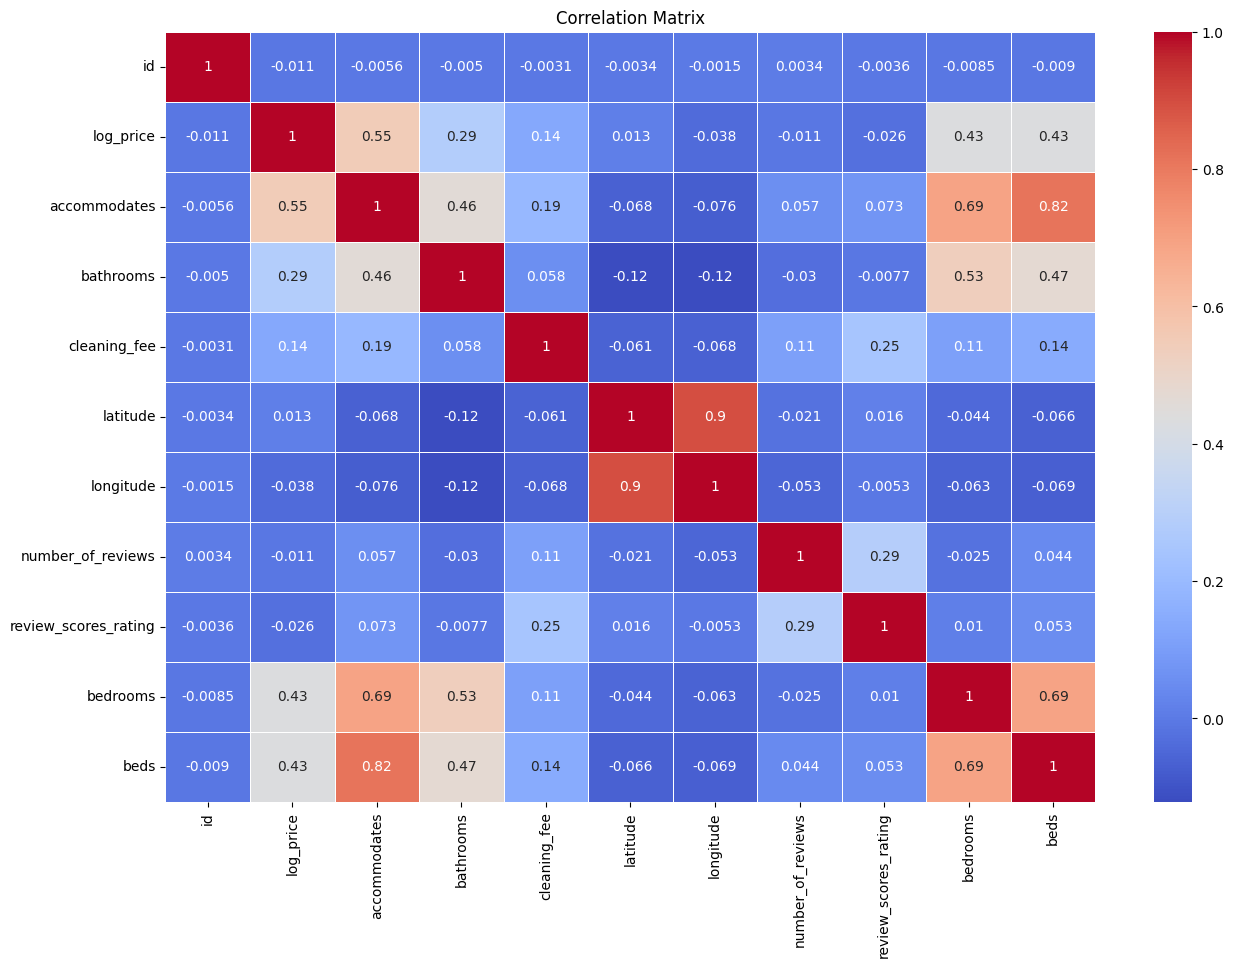

In [ ]:
num_cols = list()

for column in df.columns:
  if df[column].dtype != object:
    num_cols.append(column)
Correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(15,10))

sns.heatmap(Correlation_matrix, annot= True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

summary of this correlation matrix

Log Price Correlations:
*   Positive correlations with `accommodates`, `bathrooms`, `bedrooms`, and `beds`. This indicates that larger properties with more amenities tend to command higher prices.
*  The strongest positive correlations are with `accommodates` suggesting that the number of guests a property can accommodate is a significant factor in determining price.

Strongest Correlations (outside of log_price):
*    High positive correlation between `beds` and `accommodates`, and between `bedrooms` and `accommodates`.  This is expected as more bedrooms and beds naturally correspond to higher accommodation capacity.

Weak/No Correlation:
*  Minimal correlation between `number_of_reviews` and `log_price`.  This suggests that the number of reviews doesn't strongly influence price.




### **5. Data Preprocessing**

##### # Label Encoder is used to convert categorical values into numerical vlaues, Otherwise it through an error while prediciting a model in training testing split.

In [ ]:
# Encode Categorical values
label_encoder = {}

for column in ['property_type','amenities', 'bed_type', 'room_type', 'host_identity_verified','host_has_profile_pic', 'host_response_rate', 'city', 'cancellation_policy', 'cleaning_fee', 'neighbourhood', 'host_since']:
    # Convert the column to string type before encoding
    df[column] = df[column].astype(str)
    label_encoder[column] = LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])

### **6. Machine Learning Process**

In [ ]:
# Taking 6 features which are required for testing

X = df[['property_type', 'room_type', 'accommodates', 'bed_type', 'amenities', 'host_identity_verified', 'city']]       #input cols

y = df['log_price']            #output col


##### # Droping a column which is not required.

In [ ]:
# Features and Target
X = df.drop(['id','log_price', 'thumbnail_url', 'zipcode', 'instant_bookable', 'first_review', 'last_review', 'description', 'name', 'neighbourhood'], axis=1)
y = df['log_price']

In [ ]:
X.head(10)

In [ ]:
# split data into training and testing data

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature scaling

scaler = StandardScaler()
X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

#### **7. Applying Linear Regression Algorithm to data**

In [ ]:
# Create and train the model

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)   #training starts here

LinearRegression()

In [ ]:
multi_model.coef_    #m1 & m19 coefficients

array([ 0.00582093, -0.33129155,  0.02737881,  0.14726286,  0.05663097,
       -0.000663  ,  0.01456335, -0.00871497,  0.06310589, -0.0048727 ,
        0.00316249, -0.00940737,  0.00103065,  0.13416236, -0.10748722,
       -0.00891917, -0.05670133,  0.09978479, -0.03784947])

In [ ]:
multi_model.intercept_       #c

4.745658869697639

In [ ]:
y_pred = multi_model.predict(X_test_multi)

In [ ]:
y_pred      #Predicted values

array([4.32571695, 4.71705187, 3.81554665, ..., 4.15217985, 4.19104021,
       5.39484369])

In [ ]:
y_test_multi     #Actual values

,log_price
67995,3.912023
61632,4.564348
62072,4.094345
25392,5.857933
65214,4.828314
...,...
71711,5.857933
34876,4.077537
50533,4.094345
4827,5.003946


In [ ]:
r2_score(y_test_multi, y_pred)

0.5214817950663391

In [ ]:
y_pred_train = multi_model.predict(X_train_multi)
accuracy_score = multi_model.score(X_train_multi, y_train_multi)
accuracy_score

0.5306555223101805

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_multi, y_pred)
mae = mean_absolute_error(y_test_multi, y_pred)
r2 = r2_score(y_test_multi, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse*100:.3f}')
print(f'Mean Absolute Error: {mae*100:.3f}')
print(f'R-squared: {r2*100:.3f}')
print(f'Root Mean Squared Error: {rmse*100:.3f}')

Mean Squared Error: 20.496
Mean Absolute Error: 35.184
R-squared: 52.148
Root Mean Squared Error: 45.272


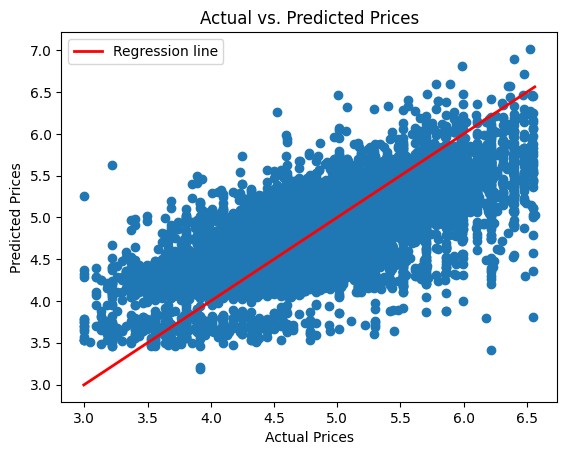

In [ ]:
# Plot actual vs predicted prices
plt.scatter(y_test_multi, y_pred)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()],color = 'red', lw=2, label = 'Regression line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()


##### # Summary:
*   The scatter plot shows a positive correlation between actual and predicted prices, meaning the model captures the pricing trend well.
*   Regression Line: The red line represents the ideal scenario where predicted prices match actual prices perfectly.




### **8. Apply Ramdom Forest Algoirthm to inhance the performance of the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_multi, y_train_multi)

# Predictions
y_pred = rf.predict(X_test_multi)

# Evaluate performance

rmse = np.sqrt(mean_squared_error(y_test_multi, y_pred))
mse = mean_squared_error(y_test_multi, y_pred)
mae = mean_absolute_error(y_test_multi, y_pred)
r2 = r2_score(y_test_multi, y_pred)

#
print(f'Root Mean Square Error: {rmse*100:.4f}')
print(f'Mean Squared Error: {mse*100:.4f}')
print(f'Mean Absolute Error: {mae*100:.4f}')
print(f'R² Score: {r2*100:.4f}')


Root Mean Square Error: 35.8382
Mean Squared Error: 12.8438
Mean Absolute Error: 26.6161
R² Score: 70.0132


####  **9. Assuming the model has already been trained and the relevant libraries have been imported**

In [ ]:
# new input according to the user

# User inputs (raw)
user_input ={
    'property_type': input('enter the property type: '),
    'room_type': input('enter the room_type: '),
    'accommodates': input('enter the accommodates: '),
    'bathrooms': input('enter the bathrooms: '),
    'bedrooms': input('enter the bedrooms: '),
    'beds': input('enter the beds: '),
    'amenities': input('enter the amenities: '),
    'city': input('enter the city: ')
}
# Features and Target
X = df.drop(['id','log_price', 'thumbnail_url', 'zipcode', 'instant_bookable', 'first_review', 'last_review', 'description', 'name', 'neighbourhood'], axis=1)
y = df['log_price']

# Store column names before scaling
X_columns = X.columns

# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

#  Encode categorical features using One-Hot Encoding
categorical_features = ["property_type", "room_type", "bed_type", "city", "host_identity_verified", "amenities"]
user_input_encoded = pd.get_dummies(user_input, columns=categorical_features)

# Ensure all columns match training data using stored column names
user_input_encoded = user_input_encoded.reindex(columns=X_columns, fill_value=0)

# Convert all values to numeric
user_input_encoded = user_input_encoded.apply(pd.to_numeric, errors='coerce')

#  Scale the input data
user_input_scaled = scaler.transform(user_input_encoded)

# Predict the price
predicted_price = multi_model.predict(user_input_scaled)

#  Output the result
print(f'Predicted Airbnb Price: ${predicted_price[0]:.2f}')



enter the property type: Entire home/apt
enter the room_type: Shared room
enter the accommodates: 8
enter the bathrooms: 15
enter the bedrooms: 16
enter the beds: 17
enter the amenities: {Kitchen,Heating,"Smoke detector","Carbon monoxide detector",Essentials,"Hair dryer","translation missing: en.hosting_amenity_50"}
enter the city: Boston
Predicted Airbnb Price: $4.75


### **Grid Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Apply Randomized Search
rf_cv = RandomizedSearchCV(
    rf, param_grid,
    n_iter=20, cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1, verbose=2, random_state=42
)

rf_cv.fit(X_train_multi, y_train_multi
          )

# Print best parameters
print("Best Parameters:", rf_cv.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


In [ ]:
# Extract best parameters
best_params = rf_cv.best_params_

# Train the final model with the best parameters
final_rf = RandomForestRegressor(**best_params, random_state=42)
final_rf.fit(X_train_multi, y_train_multi)


RandomForestRegressor(min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = final_rf.predict(X_test_multi)

# Compute evaluation metrics
#Calculating MSE, then take th square root to get RMSE
rmse = mean_squared_error(y_test_multi, y_pred)
r2 = r2_score(y_test_multi, y_pred)

print(f"RMSE: {rmse*100:.3f}%")
print(f"R² Score: {r2*100:.3f}%")


RMSE: 12.846%
R² Score: 70.007%


**Insert new data to predict the price of Airbnb**

In [ ]:
new_data = pd.DataFrame({
    'property_type': [input('enter the property type: ')],
    'room_type': [input('enter the room_type: ')],
    'accommodates': [input('enter the accommodates: ')],
    'bathrooms': [input('enter the bathrooms: ')],
    'bedrooms': [input('enter the bedrooms: ')],
    'beds': [input('enter the beds: ')],
    'amenities': [input('enter the amenities: ')],
    'city': [input('enter the city: ')]
})

# Features and Target
X = df.drop(['id','log_price', 'thumbnail_url', 'zipcode', 'instant_bookable', 'first_review', 'last_review', 'description', 'name', 'neighbourhood'], axis=1)
y = df['log_price']

# Store column names before scaling
X_columns = X.columns

# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

#  Encode categorical features using One-Hot Encoding
categorical_features = ["property_type", "room_type", "bed_type", "city", "host_identity_verified", "amenities"]
user_input_encoded = pd.get_dummies(user_input, columns=categorical_features)

# Ensure all columns match training data using stored column names
user_input_encoded = user_input_encoded.reindex(columns=X_columns, fill_value=0)

# Convert all values to numeric
user_input_encoded = user_input_encoded.apply(pd.to_numeric, errors='coerce')

#  Scale the input data
user_input_scaled = scaler.transform(user_input_encoded)

# Predict the price
predicted_price = multi_model.predict(user_input_scaled)

#  Output the result
print(f'Predicted Airbnb Price: ${predicted_price[0]:.2f}')
print("Predicted List Price:", predicted_price)


enter the property type: Loft
enter the room_type: Private room
enter the accommodates: 9
enter the bathrooms: 12
enter the bedrooms: 14
enter the beds: 17
enter the amenities: {Internet,"Wireless Internet","Air conditioning",Kitchen,"Hot tub",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}
enter the city: DC
Predicted Airbnb Price: $4.75
Predicted List Price: [4.74565887 4.74565887 4.74565887 4.74565887 4.74565887 4.74565887
 4.74565887 4.74565887]


### **Recommendations for Hosts:**

Optimize Pricing: Set competitive prices based on property size, type, and location.

Upgrade Amenities: Improve features like bathrooms and accommodates to increase pricing potential.

Choose the Right Property Type: Entire homes/apartments earn more than shared spaces.

Market in High-Demand Areas: Listings in popular locations can be priced higher.

Focus on Bookings, Not Just Reviews: While reviews don’t impact price, good ratings attract more guests.

Leverage AI-based Pricing Models: Use Random Forest or similar models to set optimal prices dynamically.